# R Session 1 - DU Bii 2021 - module 3 "R and stats"
---
---
## **Practical on dataframes on the study case "Mouse fibrotic kidney"**
*Wednesday 3rd of March, 2021*

teachers: Claire Vandiedonck & Anne Badel; helpers: Antoine Bridier-Nahmias, Bruno Toupace, Clémence Réda, Jacques van Helden


*Application proposed by Olivier Sand and Jacques van Helden; adapted by Anne Badel and Claire Vandiedonck*

- **Reference :**
    - Pavkovic, M., Pantano, L., Gerlach, C.V. et al. Multi omics analysis of fibrotic kidneys in two mouse models. Sci Data 6, 92 (2019). 
    - <https://doi.org/10.1038/s41597-019-0095-5> 
    - <https://www.nature.com/articles/s41597-019-0095-5#citeas>
    - Mouse fibrotic kidney browser: <http://hbcreports.med.harvard.edu/fmm/>
    - Data on Zenodo: <https://zenodo.org/record/2592516>


- **Samples** from two mouse models were collected. The first one is a reversible chemical-induced injury model (folic acid (FA) induced nephropathy). The second one is an irreversible surgically-induced fibrosis model (unilateral ureteral obstruction (UUO)). mRNA and small RNA sequencing, as well as 10-plex tandem mass tag (TMT) proteomics were performed with kidney samples from different time points over the course of fibrosis development. For both studies, kidneys were removed at each time point for total RNA isolation and protein sample preparation.
    - In the ***FA model***, mice were sacrificed before the treatment (day 0) and 1, 2, 7, and 14 days after a single injection of folic acid.   
    - In the ***UUO model***, mice were sacrificed before obstruction (day 0) and 3, 7, and 14 days after the ureter of the left kidney was obstructed via ligation.    


>**-> In this practical, we will explore the UUO transcriptome data:**
> "Raw" expression data were obtained after pseudocounting with Salmon algorithm (cf modules 4/5). In the paper, they further processed the data.
>
>-  **Objectives**
>
>    - reading of a first real data set
>    - manipulation of the dataset
>    - information retrieval
>    - graphic representations
>    
>
>- **Data sources**
>
>| Doc | URL | 
>|:-----------------------------|:--------------------------|
>| Total RNA for the experiment on Unilateral ureter obstruction (UUO) model | <https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE118339> |
>| Supplementary material of the article with all the data tables (zip archive)  | <https://zenodo.org/record/2592516> |


## 0. Avant toute chose
---

Faites une copie de ce notebook avec votre nom.

Définissez votre répertertoire de travail dans votre `/shared/home/login/RSession1`.

*__Tip :__*
_fonction recommandée : `setwd()`_

In [1]:
# votre code
setwd("/shared/home/cvandiedonck/RSession1")

## 1. The input data
---

Vous partirez des deux fichiers de données téléchargés suivants présents dans le repertoire `/shared/projects/dubii2021/trainers/module3/data/pavkovic/1.datainit`:

- `pavkovic2019_transcriptome_uuo_rawData.tsv`, contenant les données brutes, gènes en ligne avec leur identifiant ENSEMBLID, échantillons en colonnes
- `pavkovic2019_transcriptome_uuo_metadata.tsv`, contenant les metadata, c'est-à dire le type de données, les conditions et les numéros d'échantillon.

Ouvrez les d'abord dans l'édituer TSV du JupyterLab pour identifier s'ils contiennet des entêtes, des noms de lignes. Regardez également comment est remplie la colonne "color' du fichier metadata.

Ci-dessous, vous les importerez dans R et les reformaterez.


### A. Le data.frame `metadata`

Importez-le dans R et affichez-le.

*__Tip :__*
_fonction recommandée : `read.table()` et les options `header`, `sep` et `comment.char` appropriées._

In [2]:
metadata <- read.table("/shared/projects/dubii2021/trainers/module3/data/pavkovic/1.datainit/pavkovic2019_transcriptome_uuo_metadata.tsv", header = TRUE, sep = "\t", comment.char="")

- Quelle est sa structure et ses dimensions du dataframe "metadata" ?

*__Tip :__*
_fonction recommandée : `str()` et `dim`._

In [3]:
str(metadata)
print(dim(metadata))

'data.frame':	15 obs. of  5 variables:
 $ dataType    : Factor w/ 1 level "transcriptome": 1 1 1 1 1 1 1 1 1 1 ...
 $ sampleName  : Factor w/ 15 levels "day14_12","day14_13",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ condition   : Factor w/ 4 levels "day14","day3",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ sampleNumber: int  12 13 14 15 4 5 6 7 10 11 ...
 $ color       : Factor w/ 4 levels "#BBFFBB","#FF4400",..: 2 2 2 2 4 4 4 4 3 3 ...
[1] 15  5


- Affichez le dataframe

In [4]:
metadata

dataType,sampleName,condition,sampleNumber,color
<fct>,<fct>,<fct>,<int>,<fct>
transcriptome,day14_12,day14,12,#FF4400
transcriptome,day14_13,day14,13,#FF4400
transcriptome,day14_14,day14,14,#FF4400
transcriptome,day14_15,day14,15,#FF4400
transcriptome,day3_4,day3,4,#FFBB44
transcriptome,day3_5,day3,5,#FFBB44
transcriptome,day3_6,day3,6,#FFBB44
transcriptome,day3_7,day3,7,#FFBB44
transcriptome,day7_10,day7,10,#FF8800


- remettre les lignes dans l'ordre (normal, day3, day7, day14)

*__Tip :__*
_fonction recommandée : `order()`_

In [5]:
order_sample <- order(metadata$sampleNumber)
metadata <- metadata[order_sample,]
metadata

,dataType,sampleName,condition,sampleNumber,color
,<fct>,<fct>,<fct>,<int>,<fct>
13,transcriptome,normal_1,normal,1,#BBFFBB
14,transcriptome,normal_2,normal,2,#BBFFBB
15,transcriptome,normal_3,normal,3,#BBFFBB
5,transcriptome,day3_4,day3,4,#FFBB44
6,transcriptome,day3_5,day3,5,#FFBB44
7,transcriptome,day3_6,day3,6,#FFBB44
8,transcriptome,day3_7,day3,7,#FFBB44
11,transcriptome,day7_8,day7,8,#FF8800
12,transcriptome,day7_9,day7,9,#FF8800


### B. Le data.frame `rawData`

Importez-le dans R.

*__Tip :__*
_fonction recommandée : `read.table()` et les options `header`, `sep` et `row.names` appropriées._

In [6]:
#votre code
rawData <- read.table("/shared/projects/dubii2021/trainers/module3/data/pavkovic/1.datainit/pavkovic2019_transcriptome_uuo_rawData.tsv", sep="\t", header=T, row.names=1)

- Quelles sont la structure et les dimensions du data.frame "rawData" ?

In [7]:
str(rawData)
print(dim(rawData))

'data.frame':	46679 obs. of  15 variables:
 $ day14_12: num  3881.4 0 166.4 55.1 26.1 ...
 $ day14_13: num  1952.19 0 37.7 5.63 32.05 ...
 $ day14_14: num  2384 0 73.3 14.6 32.1 ...
 $ day14_15: num  2033.8 0 80.4 28.9 54.3 ...
 $ day3_4  : num  3350.8 0 172.4 30.2 54.2 ...
 $ day3_5  : num  3372.3 0 217.8 52.2 65.5 ...
 $ day3_6  : num  3259.2 0 197.1 11.3 33 ...
 $ day3_7  : num  3067.6 0 211 19.1 17.2 ...
 $ day7_10 : num  4569.6 0 92.8 182.6 16.8 ...
 $ day7_11 : num  2590.1 0 130.9 24.3 23.4 ...
 $ day7_8  : num  4182.9 0 186.9 116.6 32.8 ...
 $ day7_9  : num  4587.3 0 168.9 148.2 43.7 ...
 $ normal_1: num  2793.85 0 82.88 5.16 6.56 ...
 $ normal_2: num  2144.73 0 39.77 15.6 4.53 ...
 $ normal_3: num  2307.3 0 54.37 3.81 8.98 ...
[1] 46679    15


- Affichez les 1ères lignes, les dernières lignes et 7 lignes au milieu pour vérifier que le formatage est similaire.

*__Tip :__*
_fonctions recommandées : `head()`, `tail` et `median`._

In [8]:
head(rawData)

,day14_12,day14_13,day14_14,day14_15,day3_4,day3_5,day3_6,day3_7,day7_10,day7_11,day7_8,day7_9,normal_1,normal_2,normal_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000000001,3881.38478,1952.192302,2384.02939,2033.77621,3350.78732,3372.28143,3259.23312,3067.60939,4569.59425,2590.14102,4182.93784,4587.28924,2793.846292,2144.726700,2307.303535
ENSMUSG00000000003,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
ENSMUSG00000000028,166.35888,37.700782,73.26254,80.44513,172.38434,217.78642,197.06655,210.96257,92.79963,130.86642,186.89208,168.91986,82.875090,39.771783,54.367602
ENSMUSG00000000031,55.14539,5.626369,14.64380,28.89879,30.19045,52.18606,11.30483,19.11066,182.60512,24.29945,116.64482,148.19496,5.163725,15.602531,3.812504
ENSMUSG00000000037,26.08914,32.054771,32.11018,54.34109,54.24459,65.53308,32.95473,17.24996,16.77870,23.41613,32.77737,43.68694,6.562951,4.529596,8.982969
ENSMUSG00000000049,29.85438,59.216506,75.62724,139.74906,446.86321,243.68920,380.55687,623.82417,242.81399,133.78130,357.24594,224.77780,529.106836,279.475477,407.361847


In [9]:
tail(rawData)

,day14_12,day14_13,day14_14,day14_15,day3_4,day3_5,day3_6,day3_7,day7_10,day7_11,day7_8,day7_9,normal_1,normal_2,normal_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000109573,0.000000,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.0000,0.000000
ENSMUSG00000109574,1.008917,1.967906,0.000000,0.9796430,0.0000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.0000,0.000000
ENSMUSG00000109575,0.000000,0.000000,0.000000,0.6312149,0.6224359,0.0000000,4.687653,0.000000,0.000000,0.000000,0.0000000,1.269815,0.000000,0.0000,0.000000
ENSMUSG00000109576,1.041945,5.051749,3.932657,2.9886935,0.9980387,0.9910068,7.984556,6.879427,5.868171,1.038491,0.9930686,3.010362,1.966268,6.7676,4.786342
ENSMUSG00000109577,0.000000,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.0000,0.000000
ENSMUSG00000109578,0.000000,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.0000,0.000000


In [10]:
rawData[(median(1:nrow(rawData))-3):(median(1:nrow(rawData))+3),]

,day14_12,day14_13,day14_14,day14_15,day3_4,day3_5,day3_6,day3_7,day7_10,day7_11,day7_8,day7_9,normal_1,normal_2,normal_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000080790,1.95695708,5.1026565,5.160389,6.115552,1.964364,9.940706,8.104411,4.163492,10.12205,6.088714,8.0587390,3.024854,5.036251,3.9807987,2.989118
ENSMUSG00000080791,2.15345710,1.1747857,0.000000,2.033664,0.000000,0.000000,0.000000,0.000000,0.00000,1.077297,1.0900573,2.196151,0.000000,0.0000000,0.000000
ENSMUSG00000080792,0.01322356,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000
ENSMUSG00000080793,0.00000000,0.9977912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000
ENSMUSG00000080794,0.00000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000
ENSMUSG00000080795,0.00000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000
ENSMUSG00000080796,0.00000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.9836748,0.000000,0.000000,0.9895971,0.000000


- testez si les échantillons sont dans le même ordre que dans le fichier metadata

*__Tip :__*
_fonctions recommandées : `names()`, `==`._

In [11]:
names(rawData) == metadata$sampleName

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE

- remettez les échantillons dans le  même ordre que celui du fichier metadata et vérifiez que l'odre est bien le même


In [12]:
rawData <- rawData[,metadata$sampleName]
names(rawData) == metadata$sampleName
str(rawData)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

'data.frame':	46679 obs. of  15 variables:
 $ normal_1: num  2793.85 0 82.88 5.16 6.56 ...
 $ normal_2: num  2144.73 0 39.77 15.6 4.53 ...
 $ normal_3: num  2307.3 0 54.37 3.81 8.98 ...
 $ day3_4  : num  3350.8 0 172.4 30.2 54.2 ...
 $ day3_5  : num  3372.3 0 217.8 52.2 65.5 ...
 $ day3_6  : num  3259.2 0 197.1 11.3 33 ...
 $ day3_7  : num  3067.6 0 211 19.1 17.2 ...
 $ day7_8  : num  4182.9 0 186.9 116.6 32.8 ...
 $ day7_9  : num  4587.3 0 168.9 148.2 43.7 ...
 $ day7_10 : num  4569.6 0 92.8 182.6 16.8 ...
 $ day7_11 : num  2590.1 0 130.9 24.3 23.4 ...
 $ day14_12: num  3881.4 0 166.4 55.1 26.1 ...
 $ day14_13: num  1952.19 0 37.7 5.63 32.05 ...
 $ day14_14: num  2384 0 73.3 14.6 32.1 ...
 $ day14_15: num  2033.8 0 80.4 28.9 54.3 ...


- listez tous les objets intermediaires créés et ne gardez que `metadata` et `rawData` avec le même ordre pour les échantillons

*__Tip :__*
_fonctions recommandées : `ls()`, `rm()`._

In [13]:
ls()

[1] "metadata"     "order_sample" "rawData"

In [14]:
rm(order_sample)
ls()

[1] "metadata" "rawData"

## 2. Quelques manipulations de base des dataframes
---

- Extraire du jeu de données "rawData" l'information de la $101^{ème}$ ligne

In [15]:
rawData[101, ]

,normal_1,normal_2,normal_3,day3_4,day3_5,day3_6,day3_7,day7_8,day7_9,day7_10,day7_11,day14_12,day14_13,day14_14,day14_15
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000000568,1630.897,1082.593,1179.886,1918.59,2274.271,2006.218,2186.557,2327.856,2904.614,2135.551,2077.859,2474.448,1337.095,2096.118,1597.72


- Identifiez le nom du gène de la $50^{ème}$ ligne

In [16]:
row.names(rawData)[50]

[1] "ENSMUSG00000000282"

- Extraire du jeu de données "rawData" l'information pour le gène **ENSMUSG00000001855**

In [17]:
rawData["ENSMUSG00000001855", ]

,normal_1,normal_2,normal_3,day3_4,day3_5,day3_6,day3_7,day7_8,day7_9,day7_10,day7_11,day14_12,day14_13,day14_14,day14_15
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000001855,1459.514,976.5363,653.9455,1608.313,1458.228,1335.929,1814.826,1400.724,1827.669,1927.577,1577.21,1257.129,993.0711,1386.2,1042.68


- Extraire pour le jeu gène **ENSMUSG00000003810** l'information concernant le jour 7, **day7_8**

In [18]:
rawData["ENSMUSG00000003810", "day7_8"]

[1] 3615.211

- Extraire du jeu de données "rawData" l'information pour les $10^{ème}$ et $9^{ème}$ colonnes pour les lignes 30 à 35, 6 et 15:

In [19]:
rawData[c(30:35,6,15),10:9]

,day7_10,day7_9
,<dbl>,<dbl>
ENSMUSG00000000182,6.093487,0.00000
ENSMUSG00000000183,1.013445,0.00000
ENSMUSG00000000184,1494.240954,2452.78489
ENSMUSG00000000194,2242.547853,2389.83464
ENSMUSG00000000197,7.025168,11.96443
ENSMUSG00000000202,11.200068,11.95892
ENSMUSG00000000049,242.813987,224.77780
ENSMUSG00000000120,108.602189,87.92255


- Créez un sous-datframe en extrayant du jeu de données "rawData" l'information pour les colonnes concernant les expériences des jours **day3**. Effectuez une première fois l'opération sans utiliser le dataframe metadata avec la fonction `subset()`. Recommencez en utilisant le dataframe metadata et la fonction `which()`. Comparez les deux sous-dataframes obtenus pour vérifier que vous avez réussi.

*__Tip :__*
_fonctions recommandées : `subset()` avec l'argument `select`, `grep()`, `which()`, `identical()`._

In [20]:
rawData_day3.1 <- subset(rawData, select = grep("day3", names(rawData)))
rawData_day3.2 <- rawData[,which(metadata$condition == "day3")]
identical(rawData_day3.1, rawData_day3.2)

[1] TRUE

Supprimez ensuite les sous-dataframes intermédiaires.

In [21]:
ls()

[1] "metadata"       "rawData"        "rawData_day3.1" "rawData_day3.2"

In [22]:
rm(rawData_day3.1, rawData_day3.2)

In [23]:
ls()

[1] "metadata" "rawData"

## 3. Generation de statistiques descriptives sur les données brutes d'expression
---

### A. Pour chaque échantillon

- Donnez un résumé des données à l'aide de la commande `summary()`

In [24]:
summary(rawData)

    normal_1            normal_2           normal_3             day3_4        
 Min.   :      0.0   Min.   :     0.0   Min.   :      0.0   Min.   :     0.0  
 1st Qu.:      0.0   1st Qu.:     0.0   1st Qu.:      0.0   1st Qu.:     0.0  
 Median :      1.0   Median :     0.0   Median :      0.8   Median :     1.0  
 Mean   :    801.5   Mean   :   585.7   Mean   :    638.5   Mean   :   736.3  
 3rd Qu.:    123.3   3rd Qu.:    88.9   3rd Qu.:     95.1   3rd Qu.:   197.2  
 Max.   :1259045.0   Max.   :912205.9   Max.   :1101034.9   Max.   :923948.9  
     day3_5             day3_6             day3_7              day7_8        
 Min.   :     0.0   Min.   :     0.0   Min.   :      0.0   Min.   :     0.0  
 1st Qu.:     0.0   1st Qu.:     0.0   1st Qu.:      0.0   1st Qu.:     0.0  
 Median :     1.7   Median :     1.0   Median :      1.2   Median :     1.5  
 Mean   :   670.6   Mean   :   657.5   Mean   :    762.3   Mean   :   724.5  
 3rd Qu.:   222.8   3rd Qu.:   181.1   3rd Qu.:    216.5 

- Décrire à présent les 15 échantillons avec l'étendue (min et max), les valeurs de tendance (moyenne, mediane), de dispersion (écart-type, distance inter-quartile, coefficient de variation = sd/mean), et quelques valeurs caractéristiques de percentiles (5%, 15%, 75% et 95%) des niveaux d'expression.
- Vous stockerez ces résultats dans un nouveau dataframe que vous appellerez `sample_raw_stats` qui inclura les colonnes de metadata en 1ères colonnes, puis mean, sd, cv, IQR, min, p05, Q1, median, Q3, p95 et max.


*__fonction recommandées :__*

`data.frame()`, `as.data.frame()`, `matrix()`, `cbind()`

`min()`, `max()`ou `range()`

`mean()`, `sd()`, `median()` : ajoutez na.rm=T pour ne pas inclure les données manquantes

`quantile()` avec l'option `prob=`

`apply()` pour appliquer une fonction sur les vecteurs d’un dataframe en ligne ou en colonne


In [25]:
sample_raw_stats <- metadata

In [26]:
sample_raw_stats$mean <- apply(rawData, 2, mean, na.rm=TRUE)
sample_raw_stats$sd <- apply(rawData, 2, sd, na.rm=TRUE)
sample_raw_stats$cv <- sample_raw_stats$sd/sample_raw_stats$mean
sample_raw_stats$iqr <- apply(rawData, 2, IQR, na.rm=TRUE)

In [27]:
raw_perc<- apply(rawData, 2, quantile, prob = c(0, 0.05, 0.25, 0.5, 0.75, 0.95, 1), na.rm=TRUE)
sample_raw_stats <- data.frame(sample_raw_stats, t(raw_perc))
names(sample_raw_stats)[10:16] <- c("min", "p05", "Q1", "median", "Q2", "p95", "max")
sample_raw_stats

,dataType,sampleName,condition,sampleNumber,color,mean,sd,cv,iqr,min,p05,Q1,median,Q2,p95,max
,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13,transcriptome,normal_1,normal,1,#BBFFBB,801.4688,11585.840,14.455760,123.30806,0,0,0,0.9510832,123.30806,2740.617,1259045.0
14,transcriptome,normal_2,normal,2,#BBFFBB,585.7241,8237.132,14.063160,88.90841,0,0,0,0.0000000,88.90841,2035.840,912205.9
15,transcriptome,normal_3,normal,3,#BBFFBB,638.5154,9846.690,15.421225,95.10313,0,0,0,0.7722873,95.10313,2149.198,1101034.9
5,transcriptome,day3_4,day3,4,#FFBB44,736.3048,8571.434,11.641149,197.15729,0,0,0,1.0087992,197.15729,2901.547,923948.9
6,transcriptome,day3_5,day3,5,#FFBB44,670.6188,7646.529,11.402198,222.83734,0,0,0,1.6715843,222.83734,2687.531,874143.1
7,transcriptome,day3_6,day3,6,#FFBB44,657.5190,8424.795,12.813006,181.08819,0,0,0,1.0213178,181.08819,2513.557,987331.9
8,transcriptome,day3_7,day3,7,#FFBB44,762.3402,11164.818,14.645454,216.45523,0,0,0,1.2078274,216.45523,2781.556,1349891.5
11,transcriptome,day7_8,day7,8,#FF8800,724.4635,7201.438,9.940374,236.47285,0,0,0,1.4777182,236.47285,3005.630,904430.9
12,transcriptome,day7_9,day7,9,#FF8800,756.3428,6429.845,8.501231,291.49423,0,0,0,1.9963653,291.49423,3264.017,733494.3


### B. Pour chaque gène

- Vérifiez qu'il n'y a bien qu'une seule occurence de chaque gène dans le tableau rawData

*__fonction recommandées :__*

`length()`, `unique()`, `==`

In [28]:
length(unique(row.names(rawData))) == nrow(rawData)

[1] TRUE

Pour chaque gène:

- Calculer la moyenne, la médiane, l’écart type, le coefficient de variation (sd/mean) des niveaux d'expression.
- Calculer également la moyenne, l’écart type et le coefficient de variation (sd/mean) du nombre de reads par gène pour chaque condition.
- Vous stockerez ces résultats dans un nouveau dataframe que vous appellerez `gene_raw_stats` avec un gène par ligne.

*__fonction recommandées :__*

`data.frame()`, `as.data.frame()`, `matrix()`, `cbind()`

`min()`, `max()`ou `range()`

`mean()`, `sd()`, `median()` : ajoutez na.rm=T pour ne pas inclure les données manquantes

`quantile()` avec l'option `prob=`

`apply()` pour appliquer une fonction sur les vecteurs d’un dataframe en ligne ou en colonne

`colSums()`, `colMeans()`, `rowSums()` ou `rowMeans()`

In [29]:
gene_raw_stats <- as.data.frame(row.names(rawData))
names(gene_raw_stats) <- "ENSEMBL_ID"
gene_raw_stats$mean <- apply(rawData, 1, mean, na.rm=TRUE)
gene_raw_stats$median <- apply(rawData, 1, median, na.rm=TRUE)
gene_raw_stats$sd <- apply(rawData, 1, sd, na.rm=TRUE)
gene_raw_stats$cv <- gene_raw_stats$sd/gene_raw_stats$mean

In [30]:
head(gene_raw_stats)

,ENSEMBL_ID,mean,median,sd,cv
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSMUSG00000000001,3098.47552,3067.60939,893.62683,0.2884085
2,ENSMUSG00000000003,0.00000,0.00000,0.00000,NaN
3,ENSMUSG00000000028,127.49731,130.86642,64.47367,0.5056865
4,ENSMUSG00000000031,47.56196,24.29945,56.12836,1.1801103
5,ENSMUSG00000000037,30.08748,32.05477,18.30493,0.6083903
6,ENSMUSG00000000049,278.26292,243.68920,177.33235,0.6372834


In [31]:
gene_raw_stats$mean_normal <- apply(rawData[,which(metadata$condition == "normal")], 1, mean, na.rm=TRUE)
gene_raw_stats$median_normal <- apply(rawData[,which(metadata$condition == "normal")], 1, median, na.rm=TRUE)
gene_raw_stats$sd_normal <- apply(rawData[,which(metadata$condition == "normal")], 1, sd, na.rm=TRUE)
gene_raw_stats$cv_normal <- gene_raw_stats$sd_normal/gene_raw_stats$mean_normal

gene_raw_stats$mean_day3 <- apply(rawData[,which(metadata$condition == "day3")], 1, mean, na.rm=TRUE)
gene_raw_stats$median_day3 <- apply(rawData[,which(metadata$condition == "day3")], 1, median, na.rm=TRUE)
gene_raw_stats$sd_day3 <- apply(rawData[,which(metadata$condition == "day3")], 1, sd, na.rm=TRUE)
gene_raw_stats$cv_day3 <- gene_raw_stats$sd_day3/gene_raw_stats$mean_day3

gene_raw_stats$mean_day7 <- apply(rawData[,which(metadata$condition == "day7")], 1, mean, na.rm=TRUE)
gene_raw_stats$median_day7 <- apply(rawData[,which(metadata$condition == "day7")], 1, median, na.rm=TRUE)
gene_raw_stats$sd_day7 <- apply(rawData[,which(metadata$condition == "day7")], 1, sd, na.rm=TRUE)
gene_raw_stats$cv_day7 <- gene_raw_stats$sd_day7/gene_raw_stats$mean_day7

gene_raw_stats$mean_day14 <- apply(rawData[,which(metadata$condition == "day14")], 1, mean, na.rm=TRUE)
gene_raw_stats$median_day14 <- apply(rawData[,which(metadata$condition == "day14")], 1, median, na.rm=TRUE)
gene_raw_stats$sd_day14 <- apply(rawData[,which(metadata$condition == "day14")], 1, sd, na.rm=TRUE)
gene_raw_stats$cv_day14 <- gene_raw_stats$sd_day14/gene_raw_stats$mean_day14

head(gene_raw_stats)

,ENSEMBL_ID,mean,median,sd,cv,mean_normal,median_normal,sd_normal,cv_normal,mean_day3,⋯,sd_day3,cv_day3,mean_day7,median_day7,sd_day7,cv_day7,mean_day14,median_day14,sd_day14,cv_day14
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSMUSG00000000001,3098.47552,3067.60939,893.62683,0.2884085,2415.292175,2307.303535,337.765038,0.1398444,3262.47781,⋯,138.85200,0.04256029,3982.49059,4376.26605,946.79962,0.2377406,2562.84567,2208.90280,898.76446,0.3506900
2,ENSMUSG00000000003,0.00000,0.00000,0.00000,NaN,0.000000,0.000000,0.000000,NaN,0.00000,⋯,0.00000,NaN,0.00000,0.00000,0.00000,NaN,0.00000,0.00000,0.00000,NaN
3,ENSMUSG00000000028,127.49731,130.86642,64.47367,0.5056865,59.004825,54.367602,21.922629,0.3715396,199.54997,⋯,20.05787,0.10051551,144.86950,149.89314,41.83968,0.2888094,89.44183,76.85383,54.57740,0.6101999
4,ENSMUSG00000000031,47.56196,24.29945,56.12836,1.1801103,8.192920,5.163725,6.452380,0.7875555,28.19800,⋯,17.77035,0.63019880,117.93609,132.41989,67.98816,0.5764831,26.07859,21.77130,21.61697,0.8289164
5,ENSMUSG00000000037,30.08748,32.05477,18.30493,0.6083903,6.691839,6.562951,2.229483,0.3331644,42.49559,⋯,21.58035,0.50782568,29.16478,28.09675,11.69624,0.4010397,36.14879,32.08248,12.45295,0.3444913
6,ENSMUSG00000000049,278.26292,243.68920,177.33235,0.6372834,405.314720,407.361847,124.828270,0.3079786,423.73336,⋯,157.95720,0.37277499,239.65476,233.79589,91.77541,0.3829484,76.11180,67.42187,46.45835,0.6103962


## 4. Quelques questions sur les données d'expression
---

### A. Sur les gènes:

-	Combien de gènes ne sont pas exprimés du tout dans aucun échantillon ?

*__Tip :__* vous pouvez regarder la  moyenne est égale à 0 dans ce cas! Ou alors vous faites la somme et comptez les sommes égales à 0.

In [32]:
length(which(gene_raw_stats$mean == 0))

gene_sum <- apply(rawData, 1, sum)
summary(gene_sum)
sum(gene_sum == 0.0)

[1] 13300

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0        0       23     9387     3079 11922673 

[1] 13300

- Quel est le gène le plus fortement exprimé en moyenne sur l'ensemble des échantillons? Affichez les valeurs d'expression du dataframe rawData pour ce gène.

*__Tip :__* vous pouvez utiliser le dataframe de de stats sur les gènes et la fonction `which.max()`

In [33]:
gene_max <- gene_raw_stats$ENSEMBL_ID[which.max(gene_raw_stats$mean)]
gene_max
rawData[which.max(gene_raw_stats$mean),]

[1] ENSMUSG00000064351
46679 Levels: ENSMUSG00000000001 ENSMUSG00000000003 ... ENSMUSG00000109578

,normal_1,normal_2,normal_3,day3_4,day3_5,day3_6,day3_7,day7_8,day7_9,day7_10,day7_11,day14_12,day14_13,day14_14,day14_15
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000064351,1259045,912205.9,1101035,923948.9,874143.1,864898.4,1349892,904430.9,733494.3,889506.1,556132.5,352367.3,258977.4,249556.3,693040.5


- Représentez graphiquement l'expression de gène en fonction du jour à l'aide de la fonction `plot()`

*__Tip :__* les cooronnées sur l'axe des X correspondant au jour (0,3, 7 ou 14), donc générez ces positions avec `rep()`.

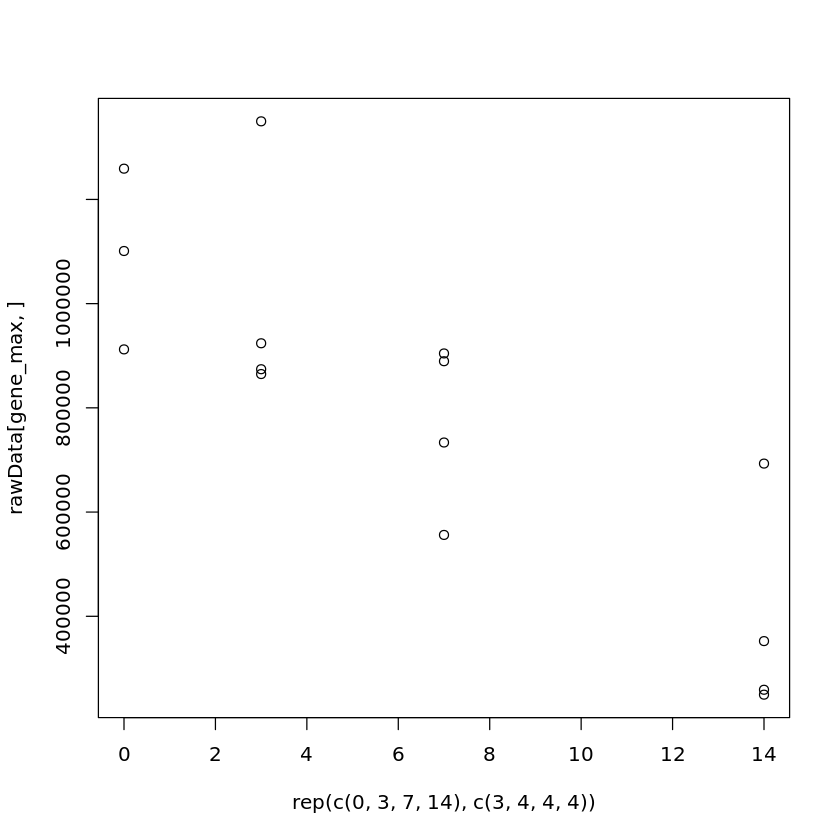

In [34]:
plot(rep(c(0, 3, 7, 14), c(3, 4, 4, 4)), rawData[gene_max,])

- Ajouter la moyenne de chaque condition pour ce gène sous forme d'une ligne ***(optionnel)***

*__Tip :__* après avoir généré le plot(), utilisez la fonction `lines()` dans la même cellule du notebook.

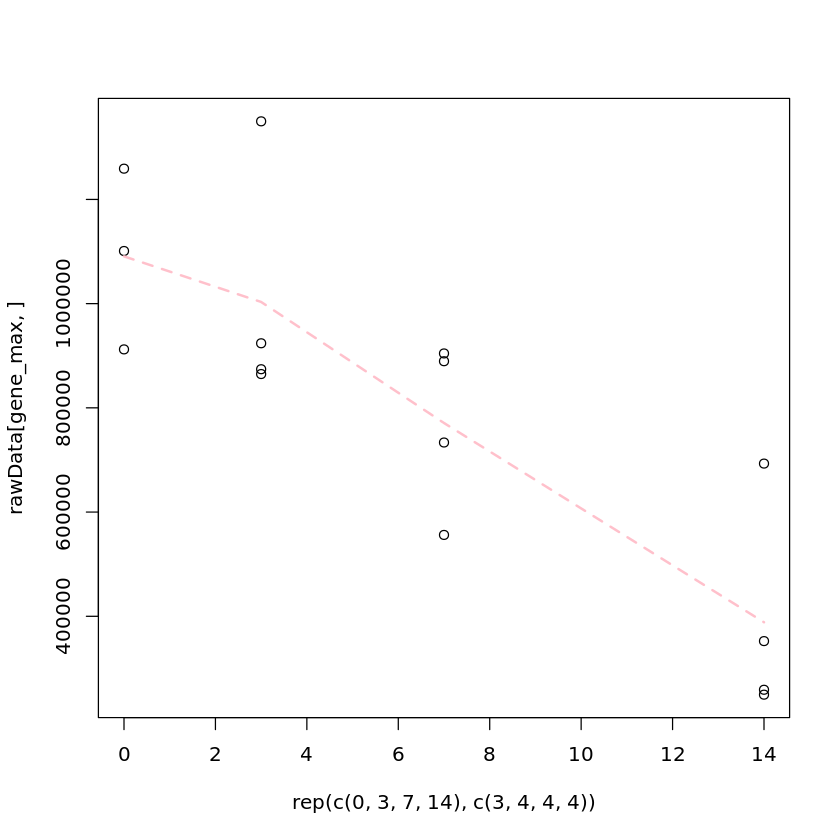

In [35]:
plot(rep(c(0, 3, 7, 14), c(3, 4, 4, 4)), rawData[gene_max,])
lines(c(0, 3, 7, 14), gene_raw_stats[gene_raw_stats$ENSEMBL_ID== gene_max,
                                     c("mean_normal", "mean_day3", "mean_day7", "mean_day14")],
      lwd = 2, col = "pink", lty = 2)

- Ajouter l'écart-type pour chaque condition sous forme d'un segment de droite ***(optionnel)***

*__Tip :__* après avoir généré le plot(), utilisez la fonction `segments()` dans la même cellule du notebook.

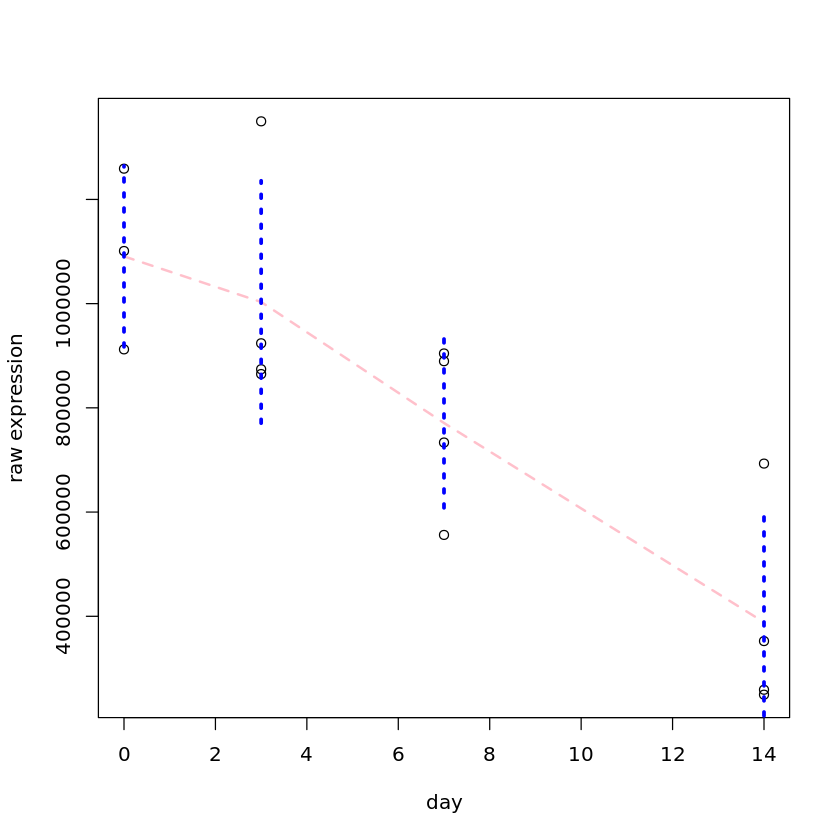

In [36]:
mean_gene_max  <- gene_raw_stats[gene_raw_stats$ENSEMBL_ID== gene_max,
                                     c("mean_normal", "mean_day3", "mean_day7", "mean_day14")]
sd_gene_max  <- gene_raw_stats[gene_raw_stats$ENSEMBL_ID== gene_max,
                                     c("sd_normal", "sd_day3", "sd_day7", "sd_day14")]
ic_min <- mean_gene_max - sd_gene_max
ic_max <- mean_gene_max + sd_gene_max

plot(rep(c(0, 3, 7, 14), c(3, 4, 4, 4)), rawData[gene_max,], xlab="day", ylab="raw expression")
lines(c(0, 3, 7, 14), mean_gene_max,
      lwd = 2, col = "pink", lty = 2)
x <- c(0, 3, 7, 14)
for (i in 1:4)
    segments(x[i], unlist(ic_min[i]), x[i], unlist(ic_max[i]), lwd = 3, col = "blue", lty = 3)

- Pour chaque condition, extrayez le gène le plus exprimé en moyenne à partir du dataframe "gene_raw_stats" ***(optionnel)***

Est-ce toujours le même?

In [37]:
gene_max_0 <- gene_raw_stats$ENSEMBL_ID[which.max(gene_raw_stats$mean_normal)]
gene_max_0
gene_max_3 <- gene_raw_stats$ENSEMBL_ID[which.max(gene_raw_stats$mean_day3)]
gene_max_3
gene_max_7 <- gene_raw_stats$ENSEMBL_ID[which.max(gene_raw_stats$mean_day7)]
gene_max_7
gene_max_14 <- gene_raw_stats$ENSEMBL_ID[which.max(gene_raw_stats$mean_day14)]
gene_max_14

[1] ENSMUSG00000064351
46679 Levels: ENSMUSG00000000001 ENSMUSG00000000003 ... ENSMUSG00000109578

[1] ENSMUSG00000064351
46679 Levels: ENSMUSG00000000001 ENSMUSG00000000003 ... ENSMUSG00000109578

[1] ENSMUSG00000064351
46679 Levels: ENSMUSG00000000001 ENSMUSG00000000003 ... ENSMUSG00000109578

[1] ENSMUSG00000064351
46679 Levels: ENSMUSG00000000001 ENSMUSG00000000003 ... ENSMUSG00000109578

-	Quel est le gène dont l’expression varie le plus parmi tous les échantillons en terme d’écart type? Est-ce le même que le plus fortement exprimé ?

In [38]:
gene_sd_max <- gene_raw_stats$ENSEMBL_ID[which.max(gene_raw_stats$sd)]
gene_sd_max
gene_max == gene_sd_max

[1] ENSMUSG00000029304
46679 Levels: ENSMUSG00000000001 ENSMUSG00000000003 ... ENSMUSG00000109578

[1] FALSE

- Représentation graphique des 10 gènes ayant les plus grandes valeurs de CV ***(optionnel)***:


    - extraire les 10 gènes en question
    
  *__Tip :__* triez les données pour sélectionner les 10 plus fortes

In [39]:
gene_cv_order <- order(gene_raw_stats$cv,decreasing = TRUE)
gene_cv_order[1:10]

gene_raw_stats[gene_cv_order[1:10],]
range(gene_raw_stats$cv, na.rm=T)

[1] 18519 18683 18702 18819 20589 25872 26630 27375 28166 29786

,ENSEMBL_ID,mean,median,sd,cv,mean_normal,median_normal,sd_normal,cv_normal,mean_day3,⋯,sd_day3,cv_day3,mean_day7,median_day7,sd_day7,cv_day7,mean_day14,median_day14,sd_day14,cv_day14
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18519,ENSMUSG00000065333,0.06542102,0,0.2533745,3.872983,0.3271051,0,0.5665626,1.732051,0.0000000,⋯,0.0000000,NaN,0.0000000,0,0.0000000,NaN,0.000000,0,0.000000,NaN
18683,ENSMUSG00000065542,0.06542102,0,0.2533745,3.872983,0.3271051,0,0.5665626,1.732051,0.0000000,⋯,0.0000000,NaN,0.0000000,0,0.0000000,NaN,0.000000,0,0.000000,NaN
18702,ENSMUSG00000065565,0.06542102,0,0.2533745,3.872983,0.3271051,0,0.5665626,1.732051,0.0000000,⋯,0.0000000,NaN,0.0000000,0,0.0000000,NaN,0.000000,0,0.000000,NaN
18819,ENSMUSG00000065743,0.06542102,0,0.2533745,3.872983,0.3271051,0,0.5665626,1.732051,0.0000000,⋯,0.0000000,NaN,0.0000000,0,0.0000000,NaN,0.000000,0,0.000000,NaN
20589,ENSMUSG00000073789,0.06809122,0,0.2637161,3.872983,0.0000000,0,0.0000000,NaN,0.2553421,⋯,0.5106841,2,0.0000000,0,0.0000000,NaN,0.000000,0,0.000000,NaN
25872,ENSMUSG00000083695,0.06654590,0,0.2577312,3.872983,0.0000000,0,0.0000000,NaN,0.0000000,⋯,0.0000000,NaN,0.2495471,0,0.4990943,2,0.000000,0,0.000000,NaN
26630,ENSMUSG00000084583,0.06542102,0,0.2533745,3.872983,0.3271051,0,0.5665626,1.732051,0.0000000,⋯,0.0000000,NaN,0.0000000,0,0.0000000,NaN,0.000000,0,0.000000,NaN
27375,ENSMUSG00000085516,0.06809122,0,0.2637161,3.872983,0.0000000,0,0.0000000,NaN,0.2553421,⋯,0.5106841,2,0.0000000,0,0.0000000,NaN,0.000000,0,0.000000,NaN
28166,ENSMUSG00000086484,0.06673947,0,0.2584809,3.872983,0.0000000,0,0.0000000,NaN,0.0000000,⋯,0.0000000,NaN,0.0000000,0,0.0000000,NaN,0.250273,0,0.500546,2


[1] 0.1180617 3.8729833


    - extraire les 10 gènes en questionreprésentation graphique (expression en fonction du jour du traitement)

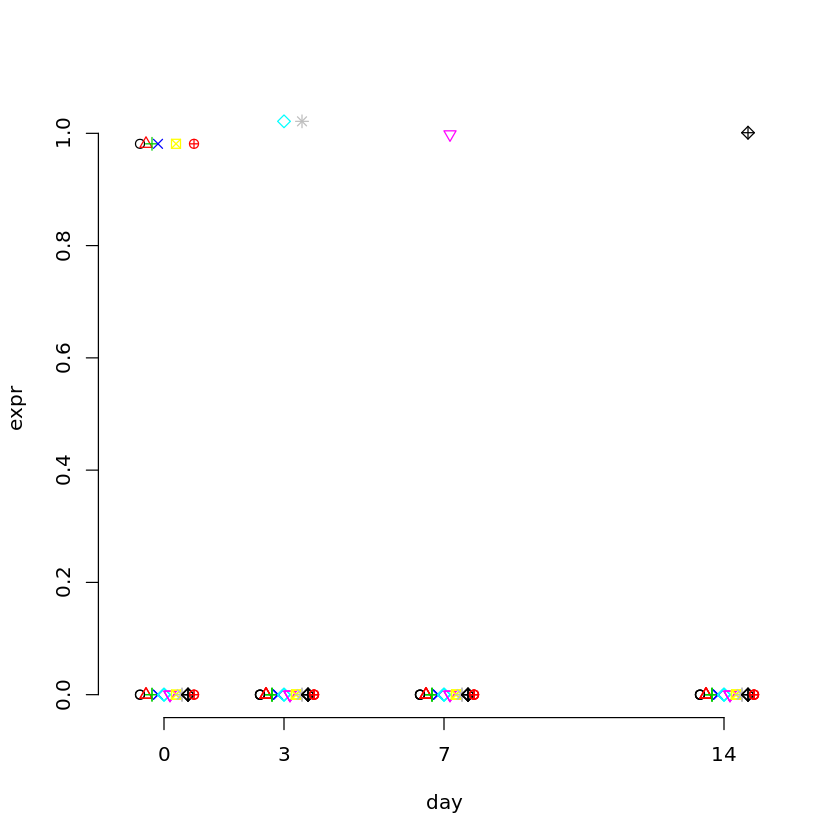

In [40]:
plot(4, 6, xlim = c(-1, 15), ylim = c(0, max(rawData[gene_cv_order[1:10], ])), type = "n", xlab = "day", ylab = "expr", axes = FALSE)
axis(side = 1, at = c(0, 3, 7, 14))
axis(2)
delta = 0.15
for (i in 1:10)
  points(rep(c(0, 3, 7, 14), c(3, 4, 4, 4)) + ((i-5) * delta), rawData[gene_cv_order[i], ], col = i, pch = i)

       - quelle est la caractéristique de ces gènes ayant un CV très élevé ?

In [41]:
for (i in 1:10)
    print(rawData[gene_cv_order[i],])

                   normal_1  normal_2 normal_3 day3_4 day3_5 day3_6 day3_7
ENSMUSG00000065333        0 0.9813153        0      0      0      0      0
                   day7_8 day7_9 day7_10 day7_11 day14_12 day14_13 day14_14
ENSMUSG00000065333      0      0       0       0        0        0        0
                   day14_15
ENSMUSG00000065333        0
                   normal_1  normal_2 normal_3 day3_4 day3_5 day3_6 day3_7
ENSMUSG00000065542        0 0.9813153        0      0      0      0      0
                   day7_8 day7_9 day7_10 day7_11 day14_12 day14_13 day14_14
ENSMUSG00000065542      0      0       0       0        0        0        0
                   day14_15
ENSMUSG00000065542        0
                   normal_1  normal_2 normal_3 day3_4 day3_5 day3_6 day3_7
ENSMUSG00000065565        0 0.9813153        0      0      0      0      0
                   day7_8 day7_9 day7_10 day7_11 day14_12 day14_13 day14_14
ENSMUSG00000065565      0      0       0       0        0 

Dans la suite de l'analyse, nous retirerons ces gènes exprimés dans peu d'échantillons.

### B. Sur les échantillons

-	Quel échantillon a le coefficient de variation moyen le plus élevé ? Proposez une représentation graphique.


*__Tip :__* utilisez le dataframe sample_raw_stats

In [42]:
sample_max_cv <- sample_raw_stats$sampleName[which.max(sample_raw_stats$cv)]
sample_max_cv

[1] normal_3
15 Levels: day14_12 day14_13 day14_14 day14_15 day3_4 day3_5 day3_6 ... normal_3

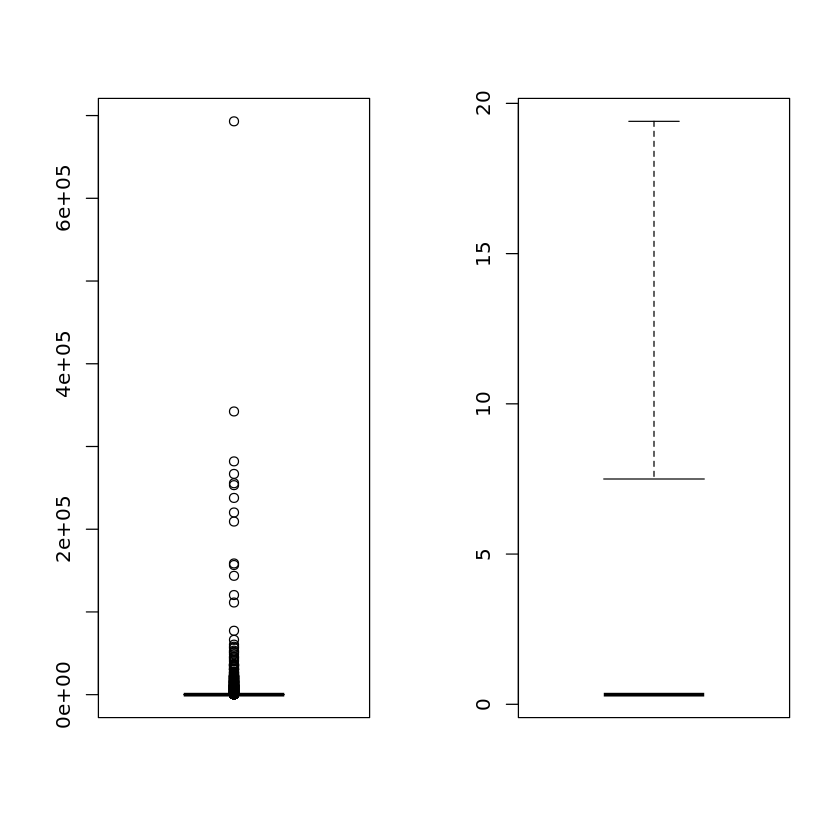

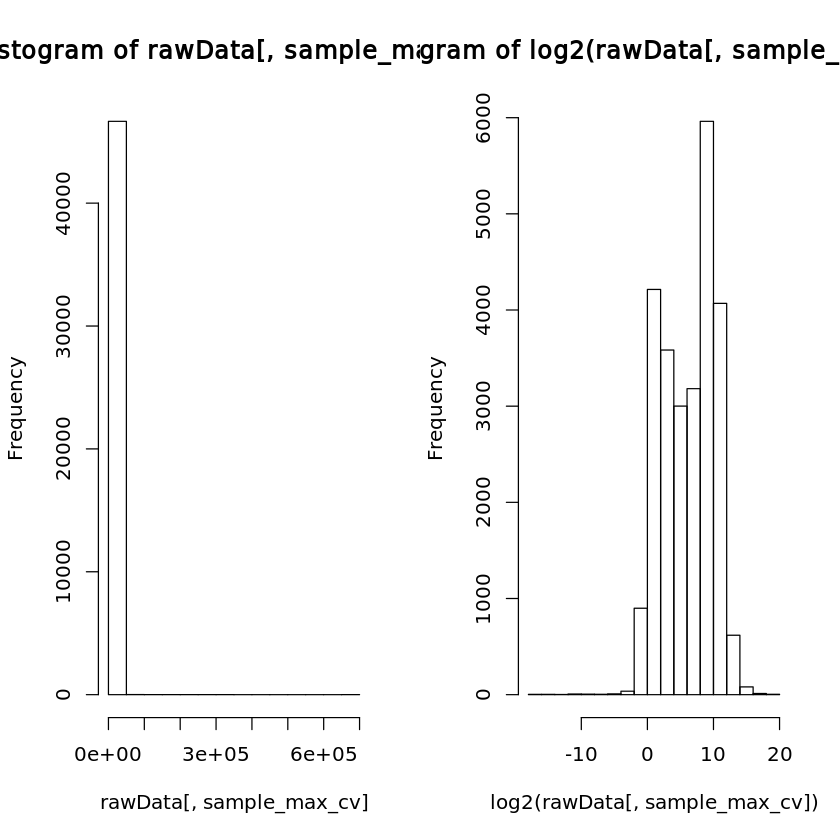

In [43]:
par(mfrow = c(1,2))
boxplot(rawData[, sample_max_cv]) ; boxplot(log2(rawData[, sample_max_cv]))
hist(rawData[, sample_max_cv]) ; hist(log2(rawData[, sample_max_cv]))
par(mfrow = c(1,1))

-	Quelle est le nombre total de pseudocounts par échantillon/librairie? Donnez un résumé et faites une représentation graphique (boxplot et histogramme de ces totaux)

*__Tip :__* utilisez la fonction `colSums()`

normal_1 normal_2 normal_3   day3_4   day3_5   day3_6   day3_7   day7_8 
37411761 27341017 29805261 34369970 31303817 30692331 35585277 33817230 
  day7_9  day7_10  day7_11 day14_12 day14_13 day14_14 day14_15 
35305326 34871963 23707516 26952308 14816871 20528048 21667034 


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
14816871 25329912 30692331 29211715 34620967 37411761 

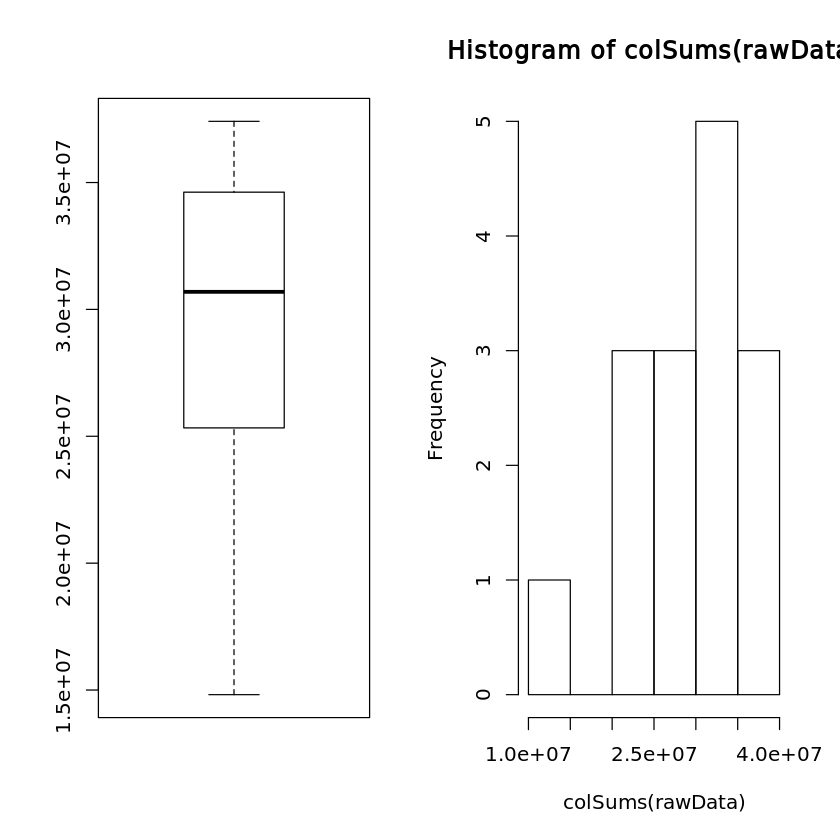

In [44]:
print(colSums(rawData))
summary(colSums(rawData))
par(mfrow = c(1,2))
boxplot(colSums(rawData))
hist(colSums(rawData))

=> On voit donc que les librarires sont de taille variable. On ne peut donc pas comparer les échantillons entre eux directement.

## 5. Transformation des data pour les analyses ultérieures
---

### A. transformation en variable discrète

Beaucoup d'outils d'analyse de RNASeq ont besoin de variables entières (données de comptage). Arrondissez toutes les valeurs à l'entier le plus proche avec la fonction `round()`. Sauvergardez ce dataframe sous le nom `rawCount`.

In [45]:
rawCount <- round(rawData)
head(rawCount)

,normal_1,normal_2,normal_3,day3_4,day3_5,day3_6,day3_7,day7_8,day7_9,day7_10,day7_11,day14_12,day14_13,day14_14,day14_15
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000000001,2794,2145,2307,3351,3372,3259,3068,4183,4587,4570,2590,3881,1952,2384,2034
ENSMUSG00000000003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000000028,83,40,54,172,218,197,211,187,169,93,131,166,38,73,80
ENSMUSG00000000031,5,16,4,30,52,11,19,117,148,183,24,55,6,15,29
ENSMUSG00000000037,7,5,9,54,66,33,17,33,44,17,23,26,32,32,54
ENSMUSG00000000049,529,279,407,447,244,381,624,357,225,243,134,30,59,76,140


### B. Distributions des comptes

AVant de transformer les données, il est nécessaire de regarder leur distribution globale et entre échantillons.

Affichez sous forme d'un seul histogramme (fonction `hist()`) l'ensemble des valeurs (fonction `unlist()`). Pensez à mettre un titre (option `main = `), un nom à l'axe des abcisses (option `xlab = `) et à l'axe des ordonnées (option `ylab = `).

#### 1. distribution of raw values

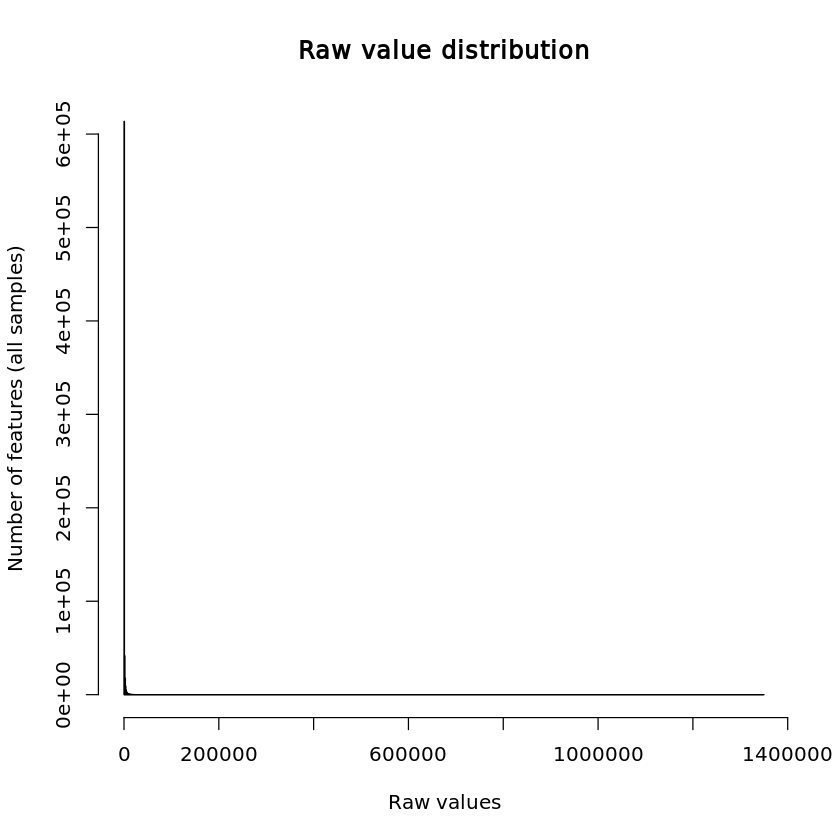

In [46]:
hist(unlist(rawData), 
     breaks = 1000, 
     main = "Raw value distribution", 
     xlab = "Raw values", 
     ylab = "Number of features (all samples)")

#### 2. distribution of raw counts

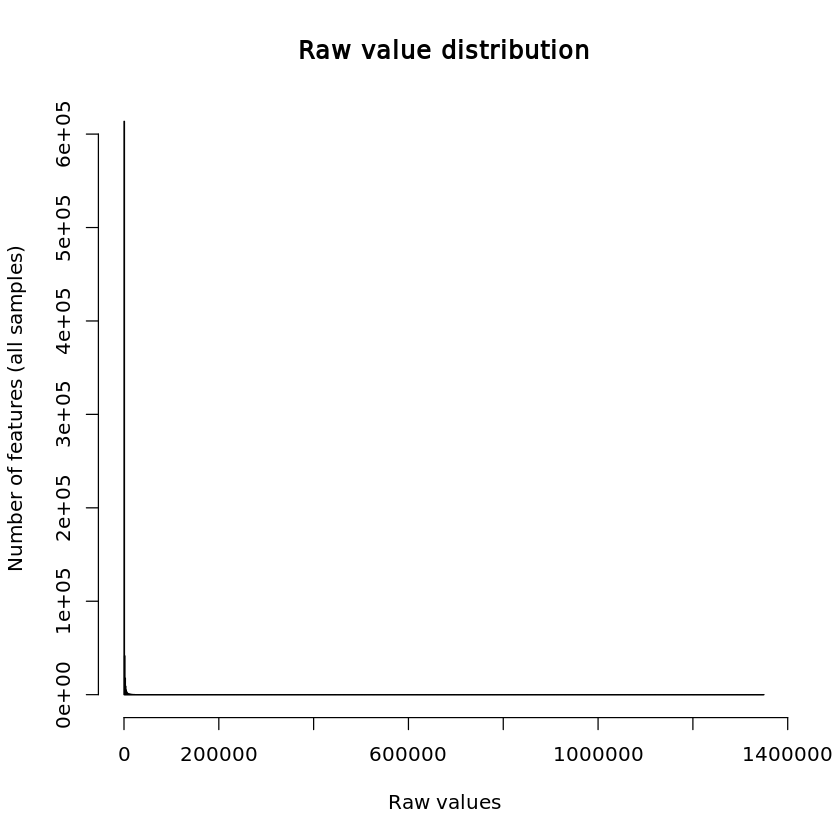

In [47]:
hist(unlist(rawCount), 
     breaks = 1000, 
     main = "Raw value distribution", 
     xlab = "Raw values", 
     ylab = "Number of features (all samples)")

The distribution of raw counts is not very informative, because the range is defined by some outlier, i.e. a feature having a huge values respective to the rest of the distribution. 

This problem is particularly sensitive for RNA-seq data: even with a strong zoom on the abcsissa range from 0 to 500, the histogram shows a steep drop in the first bins. 

#### 3.  distribution of raw counts - right-side trimming

In order to see the relevant part of the data it is convenient to truncate the histogram to the 95th percentile.

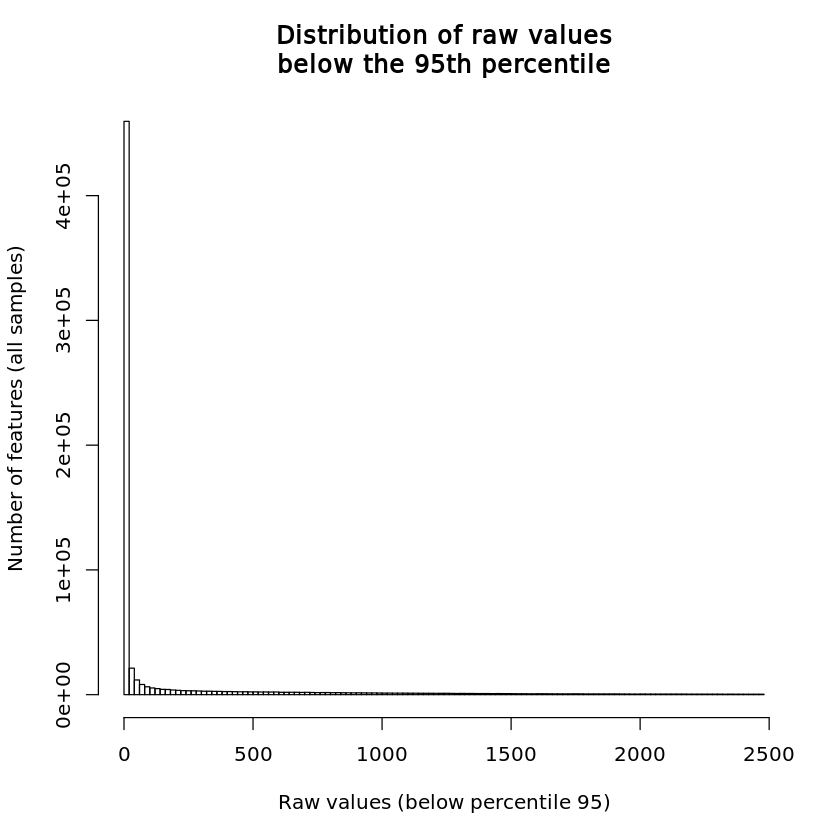

In [48]:
p95 <- quantile(x = unlist(rawCount), probs = 0.95)

## Select the values below this percentile
allData <- unlist(rawCount)
# length(allValues)
p95Data <- allData[allData <= p95]
# length(p95Values)

## Plot the histogram
hist(p95Data, breaks = 100, 
     main = "Distribution of raw values\nbelow the 95th percentile", 
     xlab = "Raw values (below percentile 95)", 
     ylab = "Number of features (all samples)")

#### 4. distribution of raw counts - two-sides trimming

For visualization, it is sometimes convenient to truncate both tails of the distribution, in order to avoid both the outliers (right tail) and the sometimes large number of zero values. This is particularly useful for single-cell RNA-seq data, which can have a "zero-inflated" distribution, but it is also useful for other data types. 


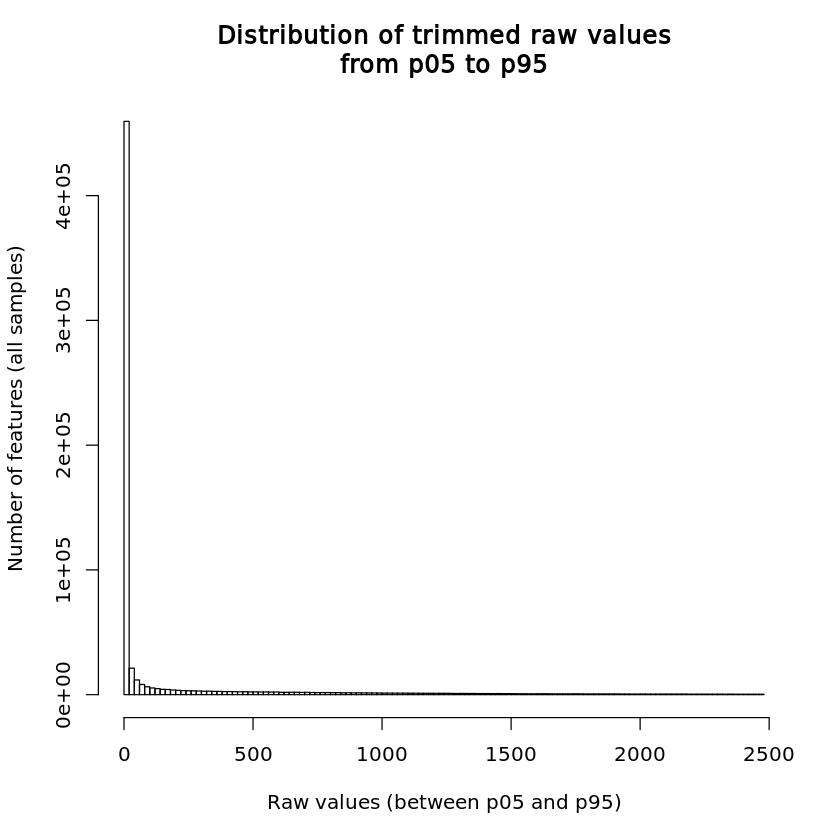

In [49]:
p05 <- quantile(x = unlist(rawCount), probs = 0.05)
p95 <- quantile(x = unlist(rawCount), probs = 0.95)

## Select the values below this percentile
allData <- unlist(rawCount)
# length(allValues)
trimmedData <- allData[(allData >= p05) & (allData <= p95)]
# length(trimmedValues)

## Plot the histogram
hist(trimmedData, breaks = 100, 
     main = "Distribution of trimmed raw values\nfrom p05 to p95", 
     xlab = "Raw values (between p05 and p95)", 
     ylab = "Number of features (all samples)")

#### 5. log2-transformed values of raw counts

A typical normalising approach is apply a log2 transformation .

For RNA-seq data, this might however create a problem when the counts of a given gene in a given sample is 0. To circumvent this, we can add an epsilon parameter (epsilon = 0.1) before the log2 transformation (function `log2()`).

- Log2-transformation

In [50]:
epsilon = 0.1
log2Values <- log2(rawData + epsilon)

- histogram

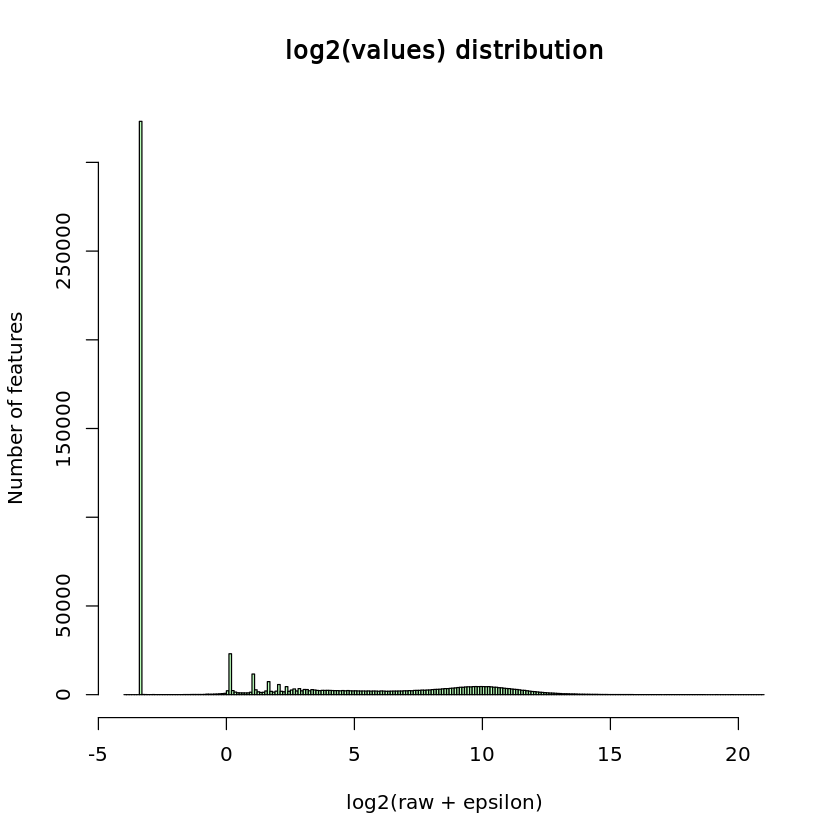

In [51]:
x <- unlist(log2Values)
minx <- floor(min(x))
maxx <- ceiling(max(x))
hist(x, 
     breaks = seq(from = minx, to = maxx, by = 0.1),
     main = "log2(values) distribution",
     xlab = "log2(raw + epsilon)", 
     ylab = "Number of features", col = "#BBFFBB")

-  box plots

We can now inspect the distribution of counts per sample with the `boxplot()` function.

    - boxplot of the raw counts

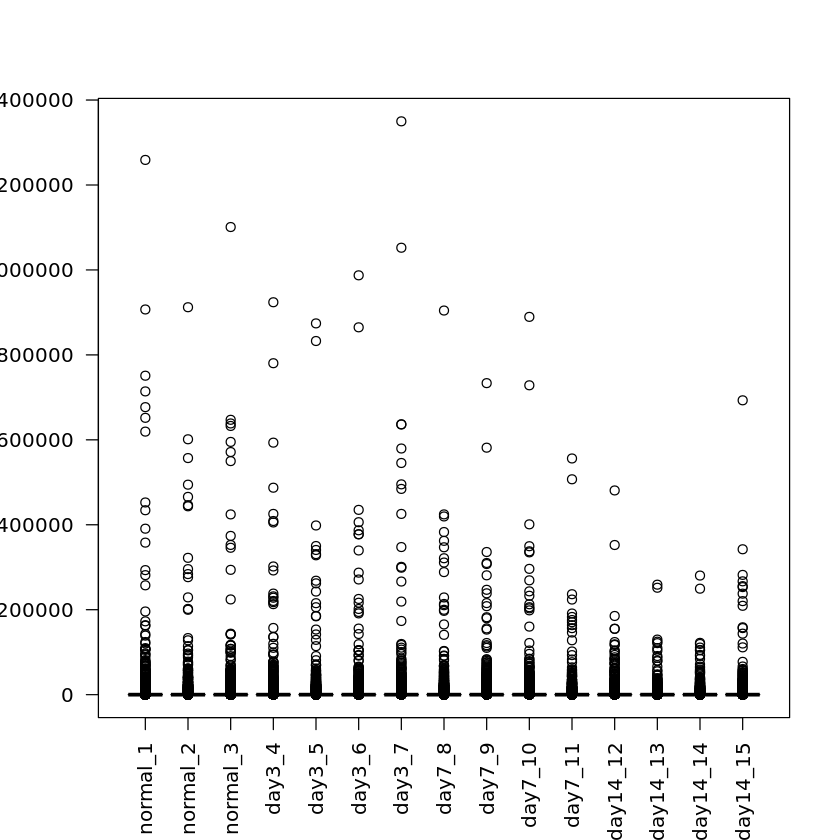

In [52]:
boxplot(rawCount, las = 2)

    - boxplot of the log2-transformed values of raw counts

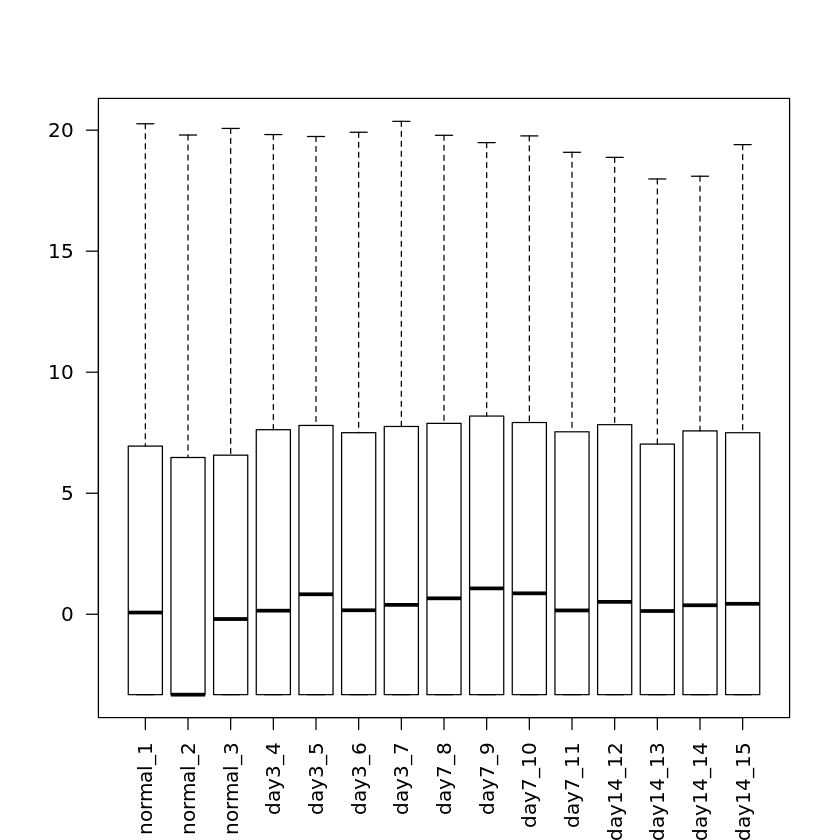

In [53]:
boxplot(log2Values, las = 2)

### C. feature filtering

We filter out the features having very low values across all the samples, which we consider as undetected. 

- search for undetected features

In [54]:
undetectedLimit = 10
undetectedFeatures <- apply(rawData, MARGIN = 1, FUN = sum)
undetectedFeatures <- apply(rawData, MARGIN = 1, FUN = sum) < undetectedLimit
length(undetectedFeatures)
sum(undetectedFeatures)

[1] 46679

[1] 20851

- storage in `log2Filtered` data.frame

In [55]:
log2Filtered <- log2Values[!undetectedFeatures, ]

- dimensions de `log2Filtered`

In [56]:
dim(log2Filtered)

[1] 25828    15

- boxplot before and after filtering

Remember to share your graphical window using the command `(par(mfrow=c(1,2))` and then return to the original parameters using the command `(par(mfrow=c(1,1))`.

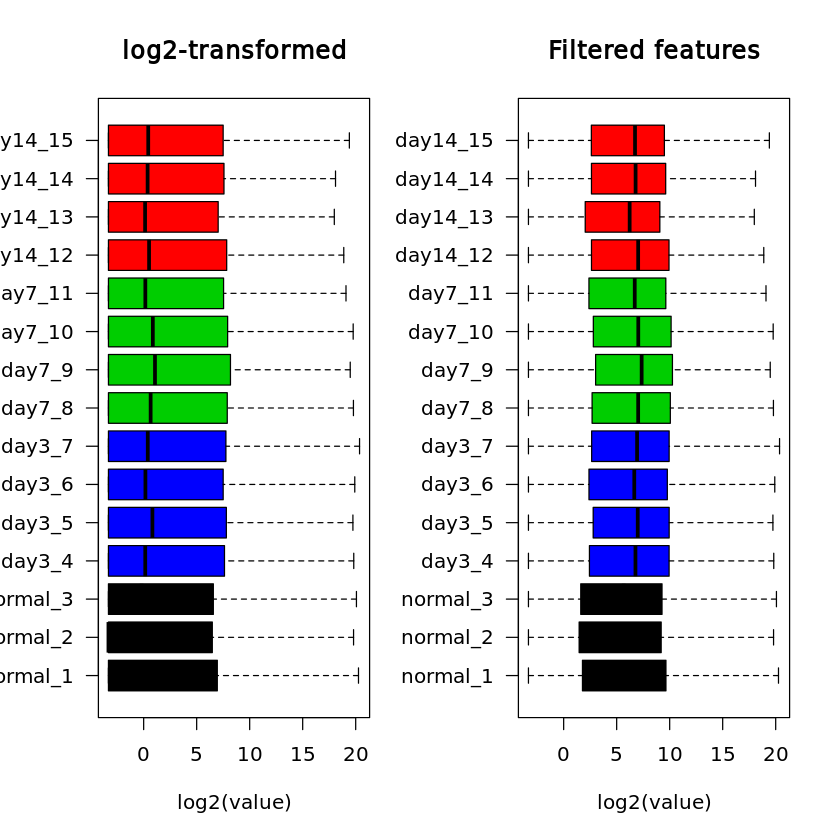

In [57]:
par(mfrow = c(1,2))
boxplot(log2Values, 
        col = metadata$color,
        horizontal = TRUE, 
        las = 1, 
        main = "log2-transformed", 
        xlab = "log2(value)")
boxplot(log2Filtered, 
        col = metadata$color,
        horizontal = TRUE, 
        las = 1,
        main = "Filtered features", 
        xlab = "log2(value)")
par(mfrow = c(1,1))

We use the remaining genes for the subsequent analyses. 

## 6. Représentation graphique des 10 gènes ayant les plus grandes valeurs de CV ***(optionnel)***

Que se passe t'il après ces opérations de filtrage ?

- calcul des CV

In [58]:
gene_mean <- apply(log2Filtered, 1, mean)
gene_sd <- apply(log2Filtered, 1, sd)
gene_cv <- gene_sd / gene_mean

- extraction des 10 plus grands CV

In [59]:
gene_cv_order <- order(gene_cv, decreasing = TRUE)
gene_cv_order[1:10]

[1] 13386  3483 24507 15703 23138 15503 18886 24971 21026 21425

- représentation graphique

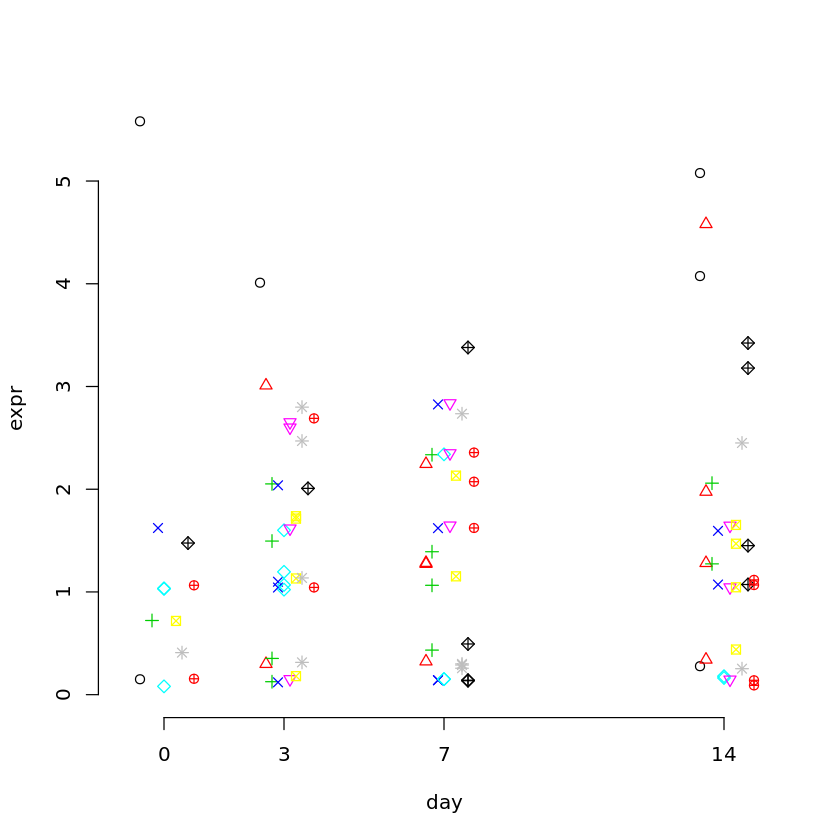

In [60]:
plot(4, 6, xlim = c(-1, 15), ylim = c(0, max(log2Filtered[gene_cv_order[1:10], ])), type = "n", xlab = "day", ylab = "expr", axes = FALSE)
axis(side = 1, at = c(0, 3, 7, 14))
axis(2)
delta = 0.15
for (i in 1:10)
  points(rep(c(0, 3, 7, 14), c(3, 4, 4, 4)) + ((i-5) * delta), log2Filtered[gene_cv_order[i], ], col = i, pch = i)

Qu'en pensez-vous?

## Pensez à sauvegardez vos données
à l'aide de la fonction `save()` ou de la fonction `write.table()`

---
---

In [61]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /shared/ifbstor1/software/miniconda/envs/r-3.6.3/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.25   crayon_1.3.4    IRdisplay_0.7.0 repr_1.1.0     
 [5] lifecycle_0.2.0 jsonlite_1.7.1  evaluate_0.14   pillar_1.4.6   
 [9] rlang_0.4.7     uuid_0.1-4      vctrs_0.3.4     ellipsis_0.3.1 
[13] IRkernel_1.1.1  tools_3.6.3     compiler_3.6.3  base64enc_